# Selection of Variables and Fitting of the model

According to the values of the previous descriptive analysis, we will study the variables to see the matrix correlation and KS index to select the best variables to classify. Before enter to this point, it is important to considerer some insights about the variables of the dataset doing a research and knowledge about the variables

The set of variables are defined by

1. age 
2. sex 
3. cp = chest pain type (4 values)
4. trestbps = resting blood pressure 
5. chol = serum cholestoral in mg/dl 
6. fbs = fasting blood sugar > 120 mg/dl
7. restecg = resting electrocardiographic results (values 0,1,2)
8. thalach = maximum heart rate achieved 
9. exang = exercise induced angina   (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest  ('ST' relates to positions on the ECG plot) ¹
11. slope = the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) ²
12. ca =number of major vessels (0-3) colored by flourosopy  (the more major vessels is a good thing, and therefore will reduce the probability of heart disease)
13. thal =  A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

¹ The ST segment is the flat, isoelectric section of the ECG between the end of the S wave (the J point) and the beginning of the T wave.
The ST Segment represents the interval between ventricular depolarization and repolarization.
The most important cause of ST segment abnormality (elevation or depression) is myocardial ischaemia or infarction. (See image - ST Segment)

<img src=".\ST Segment.jpg" width="700" height="700" alt="Created `listobjB`">

**Image - ST Segment**

² Morphology of ST Depression
ST depression can be either upsloping, downsloping, or horizontal.
Horizontal or downsloping ST depression ≥ 0.5 mm at the J-point in ≥ 2 contiguous leads indicates myocardial ischaemia (according to the 2007 Task Force Criteria).
Upsloping ST depression in the precordial leads with prominent De Winter T waves is highly specific for occlusion of the LAD.
Reciprocal change has a morphology that resembles “upside down” ST elevation and is seen in leads electrically opposite to the site of infarction.
Posterior MI manifests as horizontal ST depression in V1-3 and is associated with upright T waves and tall R waves. (See Image - ST Depression)

<img src=".\ST Depression.png" width="700" height="700" alt="Created `listobjC`">

**Image - ST Depression**

**Source of Information:** [LITFL Medical Blog,The ST Segment](https://litfl.com/st-segment-ecg-library/)

Considering a better understanding of the variables and with a little more of research, is a key factor the relationship between the age and thalach = maximum heart rate achieved, so it is included like calculated variable this relation with the variable called `Propension`. **Source of Information:** [Kaggle,What causes Heart Disease](https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model#Diagnosing-Heart-Disease)

In [1]:
import pandas as pd
import numpy as np
import random as rand
heart=pd.DataFrame(pd.read_excel('heart.xlsx',sep=',',header=0,na_values='NaN'))

#Previous variables of Descriptive Analysis
heart['ageGroup'] = ['Youth' if age < 19 else 'Senior' if age > 60 else 'Adult' for age in heart['age']]
heart['OldPeak2'] = ['Lower' if x < 0.8 else 'Higher' for x in heart['oldpeak']]
heart['RestBloodPressure'] = ['High' if x < 120 else 'Hypertensive Crisis' for x in heart['trestbps']]
heart['Cholestoral'] = ['Normal' if x < 130 else 'High' for x in heart['chol']]
def calc_maxHeartRate (num):
    age, maxrate = num
    return 'Normal' if maxrate <= 220 -age else 'High'
heart['MaxHeartRate'] = heart[['age', 'thalach']].apply(calc_maxHeartRate, axis= 1)


#Additional variable
heart['propension']=heart[['age', 'thalach']].apply(lambda x: 1 if (x['age']>=58) & (x['thalach']>0)  else 0, axis=1)

Consequently, for the selection of the variables are considered the variables available in the original dataset, the new variables already created on the Descriptive Analysis and the additional variable `Propension`

In [2]:
#----------------------------------------------------
# 2. Selection of the variables
#----------------------------------------------------

#*--For numerical variables--*
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

heart2=heart[['age','trestbps','chol','thalach','oldpeak']]  

heart2.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


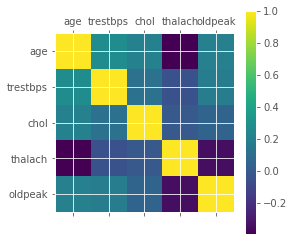

In [3]:
plt.matshow(heart2.corr())
plt.xticks(range(len(heart2.columns)), heart2.columns)
plt.yticks(range(len(heart2.columns)), heart2.columns)
plt.colorbar()
plt.show()

Through the analysis of the correlation matrix, there are no high correlations coefficients between the variables considered. -39.9% is the highest value between `thalach` vs. `age` but it is not considered like a high inverse correlation relation. Hence, according to the dependence of the variables, any variable will be excluded for the study.

Now, it will be considered the calculation of the Kolmogorov - Smirnov KS Index for both numerical and categorical variables

In [4]:
#*--For numerical variables--*

decil=heart2.quantile(np.arange(0,1.1,0.1),axis=0) 

vec=[]
count1=[]
count0=[]
count_tot=[]

#Sum 1
sum1=np.sum(heart['target'])

#Sum 0 
sum0=heart.shape[0]-np.sum(heart['target'])



for k in decil.columns:

       if len(decil[k])==decil.shape[0]:
              for i in range(0,len(decil[k])-1):
                     if i+1==(len(decil[k])-1):
                            count1.append([k,str(decil[k].iloc[i])+'-'+str(decil[k].iloc[i+1]),float(heart[(heart[k]>=(decil[k].iloc[i])) & (heart[k]<=(decil[k].iloc[i+1]))].agg({'target':np.sum})),heart[(heart[k]>=(decil[k].iloc[i])) & (heart[k]<=(decil[k].iloc[i+1]))].shape[0]]) 
                     else:
                            count1.append([k,str(decil[k].iloc[i])+'-'+str(decil[k].iloc[i+1]),float(heart[(heart[k]>=(decil[k].iloc[i])) & (heart[k]<(decil[k].iloc[i+1]))].agg({'target':np.sum})),heart[(heart[k]>=(decil[k].iloc[i])) & (heart[k]<(decil[k].iloc[i+1]))].shape[0]]) 
                            

       else:
              for i in range(0,len(decil[k])-1):

                     if i+1==len(decil[k])-1:
                            count1.append([k,str(decil[k].iloc[i])+'-'+str(decil[k].iloc[i+1]),float(heart[(heart[k]>=(decil[k][i])) & (heart[k]<=(decil[k][i+1]))].agg({'target':np.sum})),heart[(heart[k]>=(decil[k][i])) & (heart[k]<=(decil[k][i+1]))].shape[0]]) 
                     else:
                            count1.append([k,str(decil[k].iloc[i])+'-'+str(decil[k].iloc[i+1]),float(heart[(heart[k]>=(decil[k][i])) & (heart[k]<(decil[k][i+1]))].agg({'target':np.sum})),heart[(heart[k]>=(decil[k][i])) & (heart[k]<(decil[k][i+1]))].shape[0]]) 


count1_pd=pd.DataFrame(count1)   
count1_pd.columns=['Variable','Decile','count1','total']

count1_pd

,Variable,Decile,count1,total
0,age,29.0-42.0,22.0,29
1,age,42.0-45.0,20.0,27
2,age,45.0-50.0,20.0,32
3,age,50.0-53.0,22.0,32
4,age,53.0-55.0,16.0,24
5,age,55.0-58.0,15.0,36
6,age,58.0-59.0,7.0,19
7,age,59.0-62.0,9.0,33
8,age,62.0-66.0,17.0,38
9,age,66.0-77.0,17.0,33


In [5]:
#Calculate the complement Count 0
count1_pd['count0']=count1_pd['total']-count1_pd['count1']

#Calculate the % of each Count 0 and Count 1

count1_pd['P_count1']=count1_pd['count1']/sum1
count1_pd['P_count0']=count1_pd['count0']/sum0

#Calculate the difference % Count1 - %Count0

count1_pd['Dif']=abs(count1_pd['P_count1']-count1_pd['P_count0'])

#Max of Dif by Variable

count1_pd.groupby('Variable')['Dif'].aggregate([max])

,max
Variable,
age,0.119368
chol,0.051647
oldpeak,0.307510
thalach,0.137549
trestbps,0.073386


According with the KS results, the variable with `KS>20%` is the variable `oldpeak`, the other variables could not achieve a minimum of 20%. For this reason, `oldpeak` will be considered like a pre-select variable for the model. 

In [6]:
#*--For categorical variables--*


vec2=[]
heart4=[]

heart3=heart[['sex','cp','fbs','restecg','exang','slope','ca','ageGroup','OldPeak2','RestBloodPressure','Cholestoral','MaxHeartRate','propension']]


list_cat=[]
for k in heart3.columns:
       heart4=pd.concat([heart.groupby(k)['target'].count(),heart.groupby(k).aggregate({'target':np.sum})],axis=1)
       temp_work=pd.DataFrame(heart4.index)
       temp_work.set_index(heart4.index,inplace=True)
       heart4_1=pd.concat([heart4,temp_work],axis=1)
       heart4_1['Variable']=k
       heart4_1.columns
       heart4_1.columns=['target', 'target', 'Levels', 'Variable']
       heart4_1.index
       list_cat.append(heart4_1)
        

        
for k in range(0,len(list_cat)):
       list_cat[k].columns=['Total','Count1','Levels','Variable']
       list_cat[k]['Count0']=list_cat[k]['Total']-list_cat[k]['Count1']
       list_cat[k]['P_count1']=list_cat[k]['Count1']/sum1
       list_cat[k]['P_count0']=list_cat[k]['Count0']/sum0
       list_cat[k]['Dif']=abs(list_cat[k]['P_count1']-list_cat[k]['P_count0'])
       list_cat[k]['KS']=max(list_cat[k]['Dif'])        
    
print(list_cat)    

[     Total  Count1  Levels Variable  Count0  P_count1  P_count0       Dif  \
sex                                                                         
0       96      72       0      sex      24  0.436364  0.173913  0.262451   
1      207      93       1      sex     114  0.563636  0.826087  0.262451   

           KS  
sex            
0    0.262451  
1    0.262451  ,     Total  Count1  Levels Variable  Count0  P_count1  P_count0       Dif  \
cp                                                                         
0     143      39       0       cp     104  0.236364  0.753623  0.517260   
1      50      41       1       cp       9  0.248485  0.065217  0.183267   
2      87      69       2       cp      18  0.418182  0.130435  0.287747   
3      23      16       3       cp       7  0.096970  0.050725  0.046245   

         KS  
cp           
0   0.51726  
1   0.51726  
2   0.51726  
3   0.51726  ,      Total  Count1  Levels Variable  Count0  P_count1  P_count0       Dif  \
fbs   

In this case, the `KS>20%` are evidenciated in the variables `ca=46%`,`cp=52%`,`exang=41%`,`propension=22%`,`sex=26%`,`slope=39%`

In [7]:
import math

oldpeak3=count1_pd[count1_pd['Variable']=='oldpeak'].iloc[3:10]

def ln(counts):
       count1,count0=counts
       return math.log10(count1/count0)


oldpeak3['ln']=oldpeak3[['count1','count0']].apply(ln,axis=1)


oldpeak3['Decile'].iloc[6]
heart2['LN_oldpeak']=heart2['oldpeak']
for u in range(0,oldpeak3.shape[0]):
      
      oldpeak3_2=oldpeak3['Decile'].iloc[u].split(sep='-')
      print("esto es olpeak3_2[0] %1.2f y olpeak3_2[1] %1.2f " % (float(oldpeak3_2[0]),float(oldpeak3_2[1])))
      
      if u!=oldpeak3.shape[0]-1:
             heart2['LN_oldpeak'][(heart['oldpeak']>=float(oldpeak3_2[0])) & (heart['oldpeak']<float(oldpeak3_2[1]))]=oldpeak3['ln'].iloc[u]
      else:
             heart2['LN_oldpeak'][(heart['oldpeak']>=float(oldpeak3_2[0])) & (heart['oldpeak']<=float(oldpeak3_2[1]))]=oldpeak3['ln'].iloc[u]

#*--For categorical variables--*#

cat_select=['ca','cp','exang','propension','sex','slope']

counter=0
list_cat2=[]
for k in range(0,len(list_cat)):
       if list_cat[k].index.name in cat_select :
           list_cat[k]['LN']=list_cat[k][['Count1','Count0']].apply(ln,axis=1)
           print(list_cat[k][['Levels','Variable','LN']])
           list_cat2.append(list_cat[k][['Levels','Variable','LN']])


list_cat3=[]
for j in range(0,len(list_cat2)) :
       
       data_base1=pd.merge(heart[list_cat2[j].index.name],list_cat2[j][['LN','Levels']],how='left',left_on=list_cat2[j].index.name, right_on='Levels')
       data_base1.columns=[list_cat2[j].index.name,"".join(['LN_',list_cat2[j].index.name]),'Levels']
       list_cat3.append(data_base1)
       

temp=np.array(np.zeros(heart.shape[0]))

for h in range(0,len(list_cat3)):
       if h!=0:
              temp=pd.concat([list_cat3[h].iloc[:,1],pd.DataFrame(temp)],axis=1)
       else:
              temp=pd.DataFrame(list_cat3[h].iloc[:,1])              

temp.columns=['sex','cp','exang','slope','ca','propension']

heart5=pd.concat([temp,heart['id'],heart['target']],axis=1)
print(heart5)

esto es olpeak3_2[0] 0.00 y olpeak3_2[1] 0.38 
esto es olpeak3_2[0] 0.38 y olpeak3_2[1] 0.80 


C:\Users\khris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\khris\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\khris\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\khris\Anaconda3\lib\site-packages\IPython\core

esto es olpeak3_2[0] 0.80 y olpeak3_2[1] 1.12 
esto es olpeak3_2[0] 1.12 y olpeak3_2[1] 1.40 
esto es olpeak3_2[0] 1.40 y olpeak3_2[1] 1.90 
esto es olpeak3_2[0] 1.90 y olpeak3_2[1] 2.80 
esto es olpeak3_2[0] 2.80 y olpeak3_2[1] 6.20 
     Levels Variable        LN
sex                           
0         0      sex  0.477121
1         1      sex -0.088422
    Levels Variable        LN
cp                           
0        0       cp -0.425969
1        1       cp  0.658541
2        2       cp  0.583577
3        3       cp  0.359022
       Levels Variable        LN
exang                           
0           0    exang  0.359897
1           1    exang -0.519086
       Levels Variable        LN
slope                           
0           0    slope -0.124939
1           1    slope -0.268845
2           2    slope  0.485316
    Levels Variable        LN
ca                           
0        0       ca  0.460731
1        1       ca -0.321233
2        2       ca -0.646264
3        3    

C:\Users\khris\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
#*--Normalized variables--**

heart6=pd.concat([heart5,heart2['LN_oldpeak']],axis=1) 

heart6.head(5)


,sex,cp,exang,slope,ca,propension,id,target,LN_oldpeak
0,-0.164353,0.460731,-0.124939,0.359897,0.359022,-0.088422,1,1,-0.477121
1,0.247784,0.460731,-0.124939,0.359897,0.583577,-0.088422,2,1,-0.985277
2,0.247784,0.460731,0.485316,0.359897,0.658541,0.477121,3,1,0.022276
3,0.247784,0.460731,0.485316,0.359897,0.658541,-0.088422,4,1,-0.109144
4,0.247784,0.460731,0.485316,-0.519086,-0.425969,0.477121,5,1,0.583577


Now, after normalize the dataset will be calculated the train and test data according to a random value in view of that the `target` is originally arranged by first 1 and after 0 values.

In [9]:
heart6['Random']=  heart6['id'].apply(lambda x: rand.random())
heart6.columns=['LN_sex', 'LN_cp', 'LN_exang','LN_slope', 'LN_ca', 'LN_propension','id', 'target','LN_oldpeak','Random']

heart6=heart6[['LN_propension', 'LN_ca', 'LN_slope', 'LN_exang', 'LN_cp', 'LN_sex','LN_oldpeak','id', 'target','Random']]

heart6=heart6.sort_values('Random',ascending=True)
print(heart6.columns)
#x values
heart7=np.array(heart6.iloc[:,range(0,6)])

#y value
heart8=np.array(heart6['target'].values)

#*--Train/Test set ---*
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(heart7,heart8, test_size = 0.3)  #Consider 70/30



Index(['LN_propension', 'LN_ca', 'LN_slope', 'LN_exang', 'LN_cp', 'LN_sex',
       'LN_oldpeak', 'id', 'target', 'Random'],
      dtype='object')


The accuracy of the model is:  0.8681318681318682
[[36  8]
 [ 4 43]]
The positive predictive value is:  0.9148936170212766
The negative predictive value is:  0.8181818181818182
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.84      0.91      0.88        47

   micro avg       0.87      0.87      0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



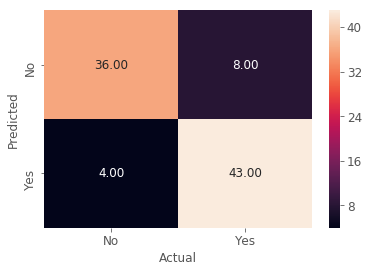

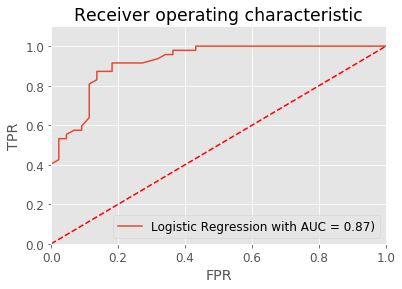

The GINI coefficient is:  0.7330754352030946


In [42]:
#*---Fitting and predict the values---*
from sklearn.linear_model import LogisticRegression
glm=LogisticRegression(solver='saga')
glm.fit(X_train,Y_train)
y_pred=glm.predict(X_test)
accuracy=np.sum(Y_test==y_pred)/Y_test.shape[0]

print("The accuracy of the model is: ",  accuracy)

#evaluation of the model:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(Y_test, y_pred)

print(confusionMatrix)

import seaborn as sn
sn.heatmap(confusionMatrix, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('Predicted',fontsize=12)
plt.xlabel('Actual',fontsize=12)

negPredictedVal = confusionMatrix[0][0] / (confusionMatrix[0][0] + confusionMatrix[0][1])
posPredictedVal = confusionMatrix[1][1] / (confusionMatrix[1][1] + confusionMatrix[1][0])

print("The positive predictive value is: ", posPredictedVal)
print("The negative predictive value is: ", negPredictedVal)

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

newRoc = roc_auc_score(Y_test, y_pred)

fpr, tpr, thresholds = roc_curve(Y_test, glm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with AUC = %0.2f)' % newRoc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


gini = (2 * newRoc) - 1
print("The GINI coefficient is: ", gini)

import statsmodels.api as sm


The Area under the curve of our model was 0.87. An AUC score of 0.5 could be attained through just guessing, and an AUC score
of 1.0 is a perfect classifier. This means that our classifier was quite successful at calculating whether a given
patient had heart disease or not
A next step is to attempt to reduce false negatives, because it is very important that our model does not tell a patient they do not have heart disease if in reality they do. Such a result may be fatal to the patient.




[[42  2]
 [21 26]]


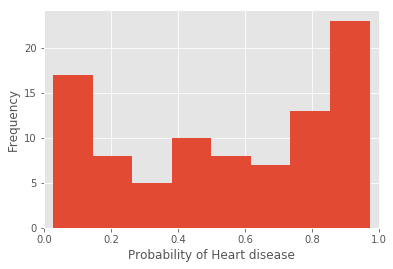